# Double Half Moon

In [180]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import math

%matplotlib inline

# Generating Data

In [181]:
numberOfPoints = 10000

radius_range = [100, 110]
distance = -50

points = []
for i in range(0, numberOfPoints):
    r = random.random()
    theta = random.random() * 2 * math.pi
    points.append([r, theta])
    
def getModifiedPoints(points):
    newPoints = []
    for point in points:
        if point[1] > math.pi:
            newPoints.append([
                (radius_range[0] + point[0]*(radius_range[1] - radius_range[0]))*math.cos(point[1]), (radius_range[0] + point[0]*(radius_range[1] - radius_range[0]))*math.sin(point[1]) - distance/2, 1])
        else:
            newPoints.append([
                (radius_range[0] + point[0]*(radius_range[1] - radius_range[0]))*math.cos(point[1]) + (radius_range[0] + radius_range[1])/2, (radius_range[0] + point[0]*(radius_range[1] - radius_range[0]))*math.sin(point[1]) + distance/2, 0])
    return newPoints

points = getModifiedPoints(points)

In [182]:
x = [row[:-2] for row in points]

y = [row[-2] for row in points]

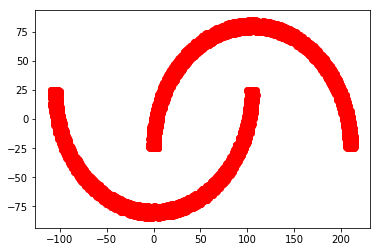

In [183]:
plt.plot(x, y, 'ro')

# Normalizing Data

In [184]:
import pandas as pd

df = pd.DataFrame(points, columns=['X','Y','Z'])

df.head()

,X,Y,Z
0,68.985458,-59.228416,1
1,62.233194,70.542207,0
2,-97.547010,-13.443431,1
3,26.716395,38.973608,0
4,16.003643,-82.735375,1


In [185]:
df.columns

Index(['X', 'Y', 'Z'], dtype='object')

In [187]:
cols_to_norm = ['X','Y']

In [189]:
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [190]:
df.head()

,X,Y,Z
0,0.550815,0.150967,1
1,0.530019,0.915636,0
2,0.037914,0.420754,1
3,0.420631,0.729619,0
4,0.387637,0.012453,1


In [191]:
x_val = tf.feature_column.numeric_column('X')

y_val = tf.feature_column.numeric_column('Y')

In [192]:
feat_cols = [x_val,y_val]

In [193]:
x_data = df.drop('Z', axis = 1)

In [194]:
x_data.head()

,X,Y
0,0.550815,0.150967
1,0.530019,0.915636
2,0.037914,0.420754
3,0.420631,0.729619
4,0.387637,0.012453


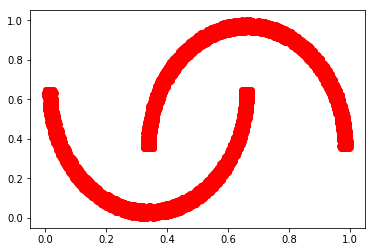

In [195]:
plt.plot(x_data['X'],x_data['Y'],'ro')

In [196]:
labels = df['Z']

In [197]:
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Z, dtype: int64

# Train Test Split

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3)

# DNN

In [251]:
input_func = tf.estimator.inputs.pandas_input_fn(x_data,labels,batch_size=10,num_epochs=1000,shuffle=True)

In [266]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[20,20,20,20,20],feature_columns = feat_cols, n_classes=2, activation_fn='relu')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\21114610\\AppData\\Local\\Temp\\tmp15as0gb4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000242D31769E8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [267]:
dnn_model.train(input_fn = input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\21114610\AppData\Local\Temp\tmp15as0gb4\model.ckpt.
INFO:tensorflow:loss = 6.8396263, step = 1
INFO:tensorflow:global_step/sec: 201.675
INFO:tensorflow:loss = 3.4315412, step = 101 (0.495 sec)
INFO:tensorflow:global_step/sec: 332.494
INFO:tensorflow:loss = 0.69850814, step = 201 (0.301 sec)
INFO:tensorflow:global_step/sec: 346.475
INFO:tensorflow:loss = 0.0809801, step = 301 (0.291 sec)
INFO:tensorflow:global_step/sec: 332.717
INFO:tensorflow:loss = 0.01419763, step = 401 (0.300 sec)
INFO:tensorflow:global_step/sec: 346.371
INFO:tensorflow:loss = 0.013740191, step = 501 (0.293 sec)
INFO:tensorflow:global_step/sec: 339.017
INFO:tensorflow:loss = 0.009351603, step = 601 (0.294 sec)
INFO:tensorflow:glo

# Prediction

In [268]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=x_data,batch_size = 10, num_epochs=1,shuffle=False)

In [269]:
predictions = dnn_model.predict(pred_input_func)

In [270]:
predictions

<generator object EstimatorV2.predict at 0x00000242D78229A8>

In [271]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\21114610\AppData\Local\Temp\tmp15as0gb4\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


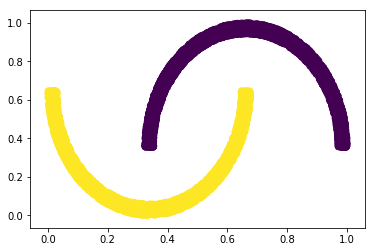

In [272]:
my_pred_x = []

my_pred_y = []

my_pred_z = []

for i in range(len(my_pred)):
    my_pred_x.append(x_data['X'][i])
    my_pred_y.append(x_data['Y'][i])
    my_pred_z.append(my_pred[i]['class_ids'][0])
    
plt.scatter(my_pred_x,my_pred_y, c = my_pred_z)